In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
ng = 1024  # number of grids
theta = 5.0  # opening angle in deg
fname = '/mnt/home/mlee1/ceph/hydro_replace_RT/L205n2500TNG/dmo/LP_00/run001/kappa23.dat'
fname2 = '/mnt/home/mlee1/ceph/hydro_replace_RT/L205n2500TNG/hydro_replace_Ml_1.00e12_Mu_3.16e12_R_5.0/LP_00/run001/kappa23.dat'
fname3 = '/mnt/home/mlee1/ceph/hydro_replace_RT/L205n2500TNG/hydro_replace_Ml_1.00e12_Mu_3.16e12_R_0.5/LP_00/run001/kappa23.dat'

pix = theta/ng  # pixel size
theta = pix*np.arange(ng)


with open(fname, 'rb') as f:
    dummy = np.fromfile(f, dtype="int32", count=1)
    kappa = np.fromfile(f, dtype="float", count=ng*ng)
    dummy = np.fromfile(f, dtype="int32", count=1)

kappa = kappa.reshape((ng, ng))

with open(fname2, 'rb') as f:
    dummy = np.fromfile(f, dtype="int32", count=1)
    kappa2 = np.fromfile(f, dtype="float", count=ng*ng)
    dummy = np.fromfile(f, dtype="int32", count=1)

kappa2 = kappa2.reshape((ng, ng))

with open(fname3, 'rb') as f:
    dummy = np.fromfile(f, dtype="int32", count=1)
    kappa3 = np.fromfile(f, dtype="float", count=ng*ng)
    dummy = np.fromfile(f, dtype="int32", count=1)

kappa3 = kappa3.reshape((ng, ng))

In [65]:
np.isnan(kappa2).sum()

0

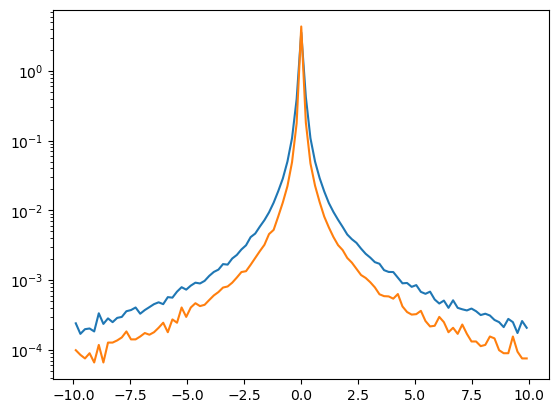

In [66]:
bins = np.linspace(-10, 10, 100)
b = bins[1:] - 0.5*np.median(np.diff(bins))
h = np.histogram((kappa/kappa2-1).ravel(), bins)[0]
h2 = np.histogram((kappa/kappa3-1).ravel(), bins)[0]
plt.plot(b, h/1024**2/np.diff(bins))
plt.semilogy(b, h2/1024**2/np.diff(bins))

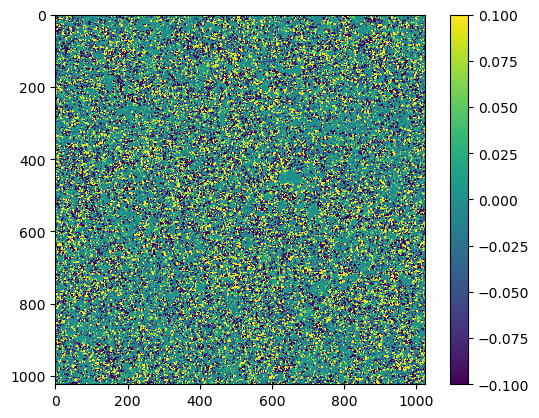

In [63]:
plt.imshow(kappa2/kappa3-1, vmin=-.1, vmax=.1)
plt.colorbar()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lenstools

/mnt/sw/nix/store/ra5wbxf51x3xx6i9dz7kw8pcbxviwzcg-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/ra5wbxf51x3xx6i9dz7kw8pcbxviwzcg-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/ra5wbxf51x3xx6i9dz7kw8pcbxviwzcg-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/ra5wbxf51x3xx6i9dz7kw8pcbxviwzcg-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

In [18]:
from raytrace import main

In [ ]:
parser.add_argument('--lp-dir', type=str,
                        help='Base lensplane directory (e.g., /path/to/L205n2500TNG)')
    parser.add_argument('--model', type=str, default='dmo',
                        help='Model: dmo, hydro, or replace config label')
    parser.add_argument('--realization', type=int, default=0,
                        help='LP realization index (0-9)')
    parser.add_argument('--source-z', type=float, default=1.0,
                        help='Source redshift (will be matched to nearest κTNG source plane)')
    parser.add_argument('--grid', type=int, default=4096,
                        help='Input plane grid resolution')
    parser.add_argument('--output', type=str, default='convergence.fits',
                        help='Output file path')
    parser.add_argument('--method', type=str, default='born',
                        choices=['born', 'raytracer'],
                        help='Method: born (direct) or raytracer (LensTools)')
    parser.add_argument('--fov', type=float, default=None,
                        help='Field of view in degrees (for raytracer; default: auto from source χ)')
    parser.add_argument('--map-res', type=int, default=512,
                        help='Output map resolution (for raytracer method)')
    parser.add_argument('--write-info', action='store_true',
                        help='Write plane info file with κTNG configuration')
    parser.add_argument('--list-sources', action='store_true',
                        help='List available source planes and exit')
    

In [14]:
from raytrace import generate_convergence, list_source_planes, SOURCE_PLANES

# See available source redshifts
list_source_planes()

# Generate a convergence map
conv_map = generate_convergence(
    lp_dir='/mnt/home/mlee1/ceph/hydro_replace_LP/L205n2500TNG/',
    model='hydro',
    realization=1,
    source_z=1.0,
    verbose=True,
    method='born'
)

# Access the data
print(f"κ mean: {conv_map.data.mean():.4f}")
print(f"κ std: {conv_map.data.std():.4f}")


Available κTNG source planes (arXiv:2010.09731 Table 2):
------------------------------------------------------------
Plane    z_S        χ_S [Mpc/h]     FOV [deg]   
------------------------------------------------------------
S1       0.034      102.50          114.5916    
S2       0.070      205.00          57.2958     
S3       0.105      307.50          38.1972     
S4       0.142      410.00          28.6479     
S5       0.179      512.50          22.9183     
S6       0.216      615.00          19.0986     
S7       0.255      717.50          16.3702     
S8       0.294      820.00          14.3239     
S9       0.335      922.50          12.7324     
S10      0.376      1025.00         11.4592     
S11      0.418      1127.50         10.4174     
S12      0.462      1230.00         9.5493      
S13      0.506      1332.50         8.8147      
S14      0.552      1435.00         8.1851      
S15      0.599      1537.50         7.6394      
S16      0.648      1640.00         

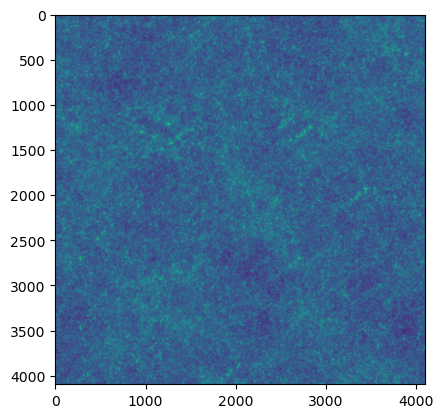

In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.log10(conv_map.data))

In [8]:
import numpy as np
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import os

# --- Configuration ---
INPUT_BASE = "/mnt/home/mlee1/ceph/hydro_replace_LP/L205n2500TNG"
MODEL = "hydro"  # or "dmo" or replace config
REALIZATION = 0  # Which LP directory (0-9)
OUTPUT_DIR = "/mnt/home/mlee1/ceph/processed_planes_TNG/"

BOX_SIZE_MPC_H = 205.0
N_PIX = 4096
PPS = 2  # planes per snapshot

# TNG Cosmology
cosmo = FlatLambdaCDM(H0=67.74, Om0=0.3089, Ob0=0.0486, Tcmb0=2.7255)

# Snapshot order (from your script - LOW z to HIGH z for file indexing)
SNAPSHOT_ORDER = [96, 90, 85, 80, 76, 71, 67, 63, 59, 56, 52, 49, 46, 43, 41, 38, 35, 33, 31, 29]
SNAPSHOT_Z = [0.04, 0.15, 0.27, 0.40, 0.50, 0.64, 0.78, 0.93, 1.07, 1.18,
              1.36, 1.50, 1.65, 1.82, 1.93, 2.12, 2.32, 2.49, 2.68, 2.87]

# Calculate comoving distances for snapshots
snapshot_chi = cosmo.comoving_distance(SNAPSHOT_Z).value * cosmo.h  # Mpc/h

# Define plane boundaries
# Boundary at z=0 (observer)
chi_min = 0.0

# Boundary beyond highest redshift snapshot
z_max_snapshot = SNAPSHOT_Z[-1]  # 2.87
chi_max_snapshot = snapshot_chi[-1]
# Extend a bit beyond the last snapshot
chi_max = chi_max_snapshot + (snapshot_chi[-1] - snapshot_chi[-2]) / 2

# Create 41 boundaries for 40 planes
# Planes are ordered: near (low z, low chi) → far (high z, high chi)
# But file indices go: lenspot00 (near) → lenspot39 (far)
n_planes = len(SNAPSHOT_ORDER) * PPS  # 40 planes
plane_boundaries = np.linspace(chi_min, chi_max, n_planes + 1)

# Calculate midpoint chi and z for each plane
plane_metadata = []
for file_idx in range(n_planes):
    chi_near = plane_boundaries[file_idx]      # Closer to observer (smaller chi)
    chi_far = plane_boundaries[file_idx + 1]   # Further from observer (larger chi)
    chi_mid = (chi_near + chi_far) / 2
    dchi = chi_far - chi_near
    
    # Convert midpoint chi back to redshift
    # Use inverse by searching a fine redshift grid
    z_grid = np.linspace(0, 3.5, 10000)
    chi_grid = cosmo.comoving_distance(z_grid).value * cosmo.h
    z_mid = z_grid[np.argmin(np.abs(chi_grid - chi_mid))]
    
    # Map to snapshot
    snap_idx = file_idx // PPS
    pps_slice = file_idx % PPS
    
    plane_metadata.append({
        'file_idx': file_idx,
        'snap': SNAPSHOT_ORDER[snap_idx],
        'snap_idx': snap_idx,
        'snap_z': SNAPSHOT_Z[snap_idx],
        'pps_slice': pps_slice,
        'z_plane': z_mid,  # Actual redshift of this plane
        'chi_mid': chi_mid,
        'dchi': dchi,
        'chi_near': chi_near,
        'chi_far': chi_far,
    })

os.makedirs(OUTPUT_DIR, exist_ok=True)

# Print plane assignment table (like κTNG Table 2)
print("Plane Assignment Table (κTNG-style):")
print(f"{'Plane':<6} {'Snap':<6} {'pps':<4} {'z_snap':<8} {'z_plane':<8} {'χ_mid':<10} {'Δχ':<10}")
print("-" * 70)
for i, p in enumerate(plane_metadata):
    if i % 4 == 0 or i == len(plane_metadata) - 1:  # Print every 4th + last
        print(f"{p['file_idx']:<6} {p['snap']:<6} {p['pps_slice']:<4} "
              f"{p['snap_z']:<8.2f} {p['z_plane']:<8.2f} {p['chi_mid']:<10.1f} {p['dchi']:<10.1f}")

def read_lensplane_binary(filepath, grid_res):
    """Read lensplane from lux binary format."""
    with open(filepath, 'rb') as f:
        header = np.fromfile(f, dtype=np.int32, count=1)[0]
        if header != grid_res:
            raise ValueError(f"Grid mismatch: expected {grid_res}, got {header}")
        data = np.fromfile(f, dtype=np.float64, count=grid_res**2)
        data = data.reshape((grid_res, grid_res))
        footer = np.fromfile(f, dtype=np.int32, count=1)
    return data

def process_plane(meta):
    file_idx = meta['file_idx']
    lp_dir = f"LP_{REALIZATION:02d}"
    infile = os.path.join(INPUT_BASE, MODEL, lp_dir, f"lenspot{file_idx:02d}.dat")
    
    if not os.path.exists(infile):
        print(f"SKIP: {infile}")
        return
    
    # Read binary
    raw_mass = read_lensplane_binary(infile, N_PIX)
    
    # Convert to surface density [M_sun/h / (Mpc/h)^2]
    pixel_area = (BOX_SIZE_MPC_H / N_PIX)**2
    sigma = raw_mass / pixel_area
    
    # Write FITS with plane redshift (not snapshot redshift!)
    hdu = fits.PrimaryHDU(sigma.astype(np.float32))
    hdr = hdu.header
    hdr['BOXSIZE'] = BOX_SIZE_MPC_H
    hdr['Z'] = meta['z_plane']  # Use plane redshift
    hdr['DCHI'] = meta['dchi']
    hdr['CHI_MID'] = meta['chi_mid']
    hdr['CHI_NEAR'] = meta['chi_near']
    hdr['CHI_FAR'] = meta['chi_far']
    hdr['SNAP'] = meta['snap']
    hdr['SNAP_Z'] = meta['snap_z']
    hdr['PPS'] = meta['pps_slice']
    hdr['FILEIDX'] = file_idx
    hdr['COM'] = 'TNG'
    hdr['MODEL'] = MODEL
    hdr['REAL'] = REALIZATION
    
    outname = os.path.join(OUTPUT_DIR, f"plane_{file_idx:02d}_z{meta['z_plane']:.3f}.fits")
    hdu.writeto(outname, overwrite=True)

# Process all 40 planes
print(f"\nProcessing {len(plane_metadata)} planes...")
for meta in plane_metadata:
    process_plane(meta)

print(f"\nDone!")
print(f"Redshift range: z={plane_metadata[0]['z_plane']:.3f} (near) to z={plane_metadata[-1]['z_plane']:.3f} (far)")
print(f"Comoving distance range: χ={plane_metadata[0]['chi_mid']:.1f} to χ={plane_metadata[-1]['chi_mid']:.1f} Mpc/h")


Plane Assignment Table (κTNG-style):
Plane  Snap   pps  z_snap   z_plane  χ_mid      Δχ        
----------------------------------------------------------------------
0      96     0    0.04     0.02     54.9       109.7     
4      85     0    0.27     0.17     493.9      109.7     
8      76     0    0.50     0.34     932.9      109.7     
12     67     0    0.78     0.52     1371.8     109.7     
16     59     0    1.07     0.73     1810.8     109.7     
20     52     0    1.36     0.97     2249.8     109.7     
24     46     0    1.65     1.25     2688.8     109.7     
28     41     0    1.93     1.57     3127.8     109.7     
32     35     0    2.32     1.97     3566.8     109.7     
36     31     0    2.68     2.45     4005.8     109.7     
39     29     1    2.87     2.89     4335.0     109.7     

Processing 40 planes...

Done!
Redshift range: z=0.019 (near) to z=2.890 (far)
Comoving distance range: χ=54.9 to χ=4335.0 Mpc/h


In [13]:
from lenstools.simulations import RayTracer, DensityPlane
from lenstools import ConvergenceMap
from astropy.cosmology import FlatLambdaCDM
from astropy.io import fits
import glob
import numpy as np
import astropy.units as u

# --- Configuration ---
PLANE_DIR = "/mnt/home/mlee1/ceph/processed_planes_TNG/"
OUTPUT_PREFIX = "tng_kappa_hydro_LP00"

# TNG Cosmology
cosmo = FlatLambdaCDM(H0=67.74, Om0=0.3089, Ob0=0.0486, Tcmb0=2.7255)

# Source redshifts
Z_SOURCES = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

print("=" * 70)
print("LensTools Ray Tracing - Proper Workflow")
print("=" * 70)

# Load plane files
plane_files = sorted(glob.glob(f"{PLANE_DIR}/plane_*.fits"))
print(f"Found {len(plane_files)} lens planes")

if len(plane_files) == 0:
    print("ERROR: No plane files found!")
    exit(1)

# Initialize RayTracer with PotentialPlane type
print("\nInitializing RayTracer...")
from lenstools.simulations import PotentialPlane
tracer = RayTracer()
tracer.lens_type = PotentialPlane

print("\nLoading density planes and converting to potential planes...")
print("-" * 70)

for i, f in enumerate(plane_files):
    # Read FITS
    with fits.open(f) as hdul:
        hdr = hdul[0].header
        z_lens = hdr['Z']
        box_size_mpc = hdr['BOXSIZE']  # Mpc/h
        surface_density = hdul[0].data  # M_sun/h per (Mpc/h)^2
    
    # Ensure proper array format
    surface_density = np.ascontiguousarray(surface_density, dtype=np.float64)
    
    # Calculate comoving distance
    comoving_distance = cosmo.comoving_distance(z_lens).to(u.Mpc).value * cosmo.h  # Mpc/h
    
    # Calculate angular size
    angle_rad = box_size_mpc / comoving_distance
    angle_deg = np.rad2deg(angle_rad)
    
    # Step 1: Create DensityPlane
    density_plane = DensityPlane(
        surface_density,
        angle=angle_deg * u.deg,
        redshift=z_lens,
        cosmology=cosmo,
        unit=u.Msun / (u.Mpc**2)  # Surface density units
    )
    
    # Step 2: Convert DensityPlane → PotentialPlane using Poisson solver
    potential_plane = density_plane.potential()
    
    # Step 3: Add PotentialPlane to RayTracer
    tracer.addLens(potential_plane)
    
    if i % 10 == 0:
        print(f"  Plane {i:02d}: z={z_lens:.3f}, χ={comoving_distance:.1f} Mpc/h, angle={angle_deg:.2f}°")

print(f"\n  Total planes loaded: {len(plane_files)}")
print(f"  Redshift range: z={tracer.minZ:.3f} to z={tracer.maxZ:.3f}")

# Ray tracing to multiple source redshifts
print("\nRay tracing to source redshifts...")
print("-" * 70)

for z_s in Z_SOURCES:
    # Check that source is beyond last lens
    if z_s <= tracer.maxZ:
        print(f"  z_source={z_s:.1f}: SKIP (≤ max lens z={tracer.maxZ:.2f})")
        continue
    
    print(f"  z_source={z_s:.1f}: ", end="", flush=True)
    
    try:
        # Shoot rays through the lens planes
        kappa_map = tracer.shoot(
            z_s,
            kind="convergence",
            save_intermediate=False
        )
        
        # Save convergence map
        outfile = f"{OUTPUT_PREFIX}_zs{z_s:.1f}.fits"
        kappa_map.save(outfile)
        
        # Statistics
        mean_k = np.mean(kappa_map.data)
        std_k = np.std(kappa_map.data)
        min_k = np.min(kappa_map.data)
        max_k = np.max(kappa_map.data)
        
        print(f"✓ κ: mean={mean_k:.4e}, std={std_k:.4e}, range=[{min_k:.4e}, {max_k:.4e}]")
    
    except Exception as e:
        print(f"✗ ERROR: {e}")
        import traceback
        traceback.print_exc()

print("-" * 70)
print("Ray tracing complete!")
print(f"Output files: {OUTPUT_PREFIX}_zs*.fits")
print("=" * 70)


LensTools Ray Tracing - Proper Workflow
Found 40 lens planes

Initializing RayTracer...

Loading density planes and converting to potential planes...
----------------------------------------------------------------------
  Plane 00: z=0.019, χ=55.4 Mpc/h, angle=212.10°
  Plane 10: z=0.429, χ=1152.3 Mpc/h, angle=10.19°
  Plane 20: z=0.970, χ=2249.9 Mpc/h, angle=5.22°
  Plane 30: z=1.762, χ=3347.3 Mpc/h, angle=3.51°

  Total planes loaded: 40

Ray tracing to source redshifts...
----------------------------------------------------------------------


AttributeError: 'RayTracer' object has no attribute 'maxZ'

In [ ]:
PLANE_DIR = "/mnt/home/mlee1/ceph/processed_planes_TNG/"
